# Titanic Challenge

## Input Data

In [1601]:
import pandas as pd
import numpy as np
import math

Load Training data from train.csv

In [1602]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Load Testing data from test.csv

In [1603]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Unique Value for Pclass

In [1604]:
print(train['Pclass'].unique())
print(test['Pclass'].unique())

[3 1 2]
[3 2 1]


Bounds for the Age column

In [1605]:
print(train['Age'].min())
print(train['Age'].max())
print(test['Age'].min())
print(test['Age'].max())

0.42
80.0
0.17
76.0


## Data Analysis and Preparation

Reload the data frames with PassengerId as index

In [1606]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [1607]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pclass

Survival Rate per Pclass

In [1608]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1609]:
from sklearn.preprocessing import MinMaxScaler

In [1610]:
pclass_scaler = MinMaxScaler()

train['Pclass'] = pclass_scaler.fit_transform(train['Pclass'].values.reshape(-1,1))
test['Pclass'] = pclass_scaler.transform(test['Pclass'].values.reshape(-1,1))

In [1611]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,1.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,1.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Name

In [1612]:
train['Title'] = train['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())

train.groupby(['Title','Survived'])[['Title','Survived']].count()

Title  Survived
Title        Survived                 
Capt         0             1         1
Col          0             1         1
             1             1         1
Don          0             1         1
Dr           0             4         4
             1             3         3
Jonkheer     0             1         1
Lady         1             1         1
Major        0             1         1
             1             1         1
Master       0            17        17
             1            23        23
Miss         0            55        55
             1           127       127
Mlle         1             2         2
Mme          1             1         1
Mr           0           436       436
             1            81        81
Mrs          0            26        26
             1            99        99
Ms           1             1         1
Rev          0             6         6
Sir          1             1         1
the Countess 1             1         1

In [1613]:
print(train['Title'].unique())
print(test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [1614]:
title_hirearchy = {
    'Dona' : 1
}
titles = []
survival_rates = []
counter = 0

train.loc[train['Title'] == 'Mlle', 'Title'] = 'Miss'
train.loc[train['Title'] == 'Mme', 'Title'] = 'Mrs'

for title in train['Title'].unique():
    filtered = train[train['Title'] == title]
    survived_count = (filtered['Survived'] == 1).sum()
    title_hirearchy[title] = survived_count / len(filtered)
    titles.append(title)
    survival_rates.append(survived_count / len(filtered))

train['Title'] = train['Title'].map(title_hirearchy)
test['Title'] = test['Title'].map(title_hirearchy)

train = train.drop(columns=['Name'])
test = test.drop(columns=['Name'])



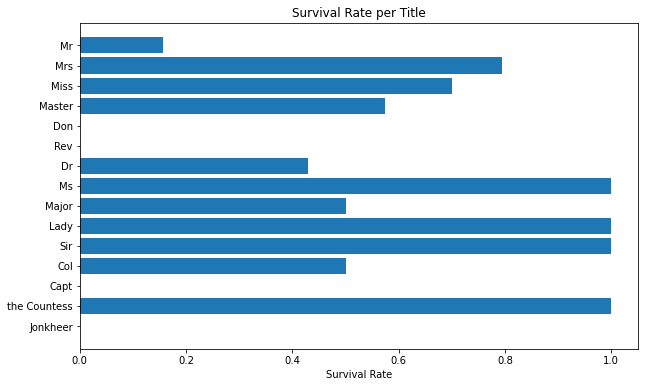

In [1615]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(len(titles)), survival_rates, tick_label = titles, align='center')
ax.invert_yaxis()
ax.set_xlabel('Survival Rate')
ax.set_title('Survival Rate per Title')

plt.show()

### Sex

In [1616]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


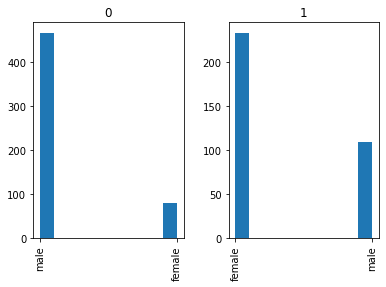

In [1617]:
train['Sex'].hist(by=train['Survived']);

In [1618]:
from sklearn.preprocessing import LabelEncoder

In [1619]:
sex_encoder = LabelEncoder()
train['Sex'] = sex_encoder.fit_transform(train['Sex'])
test['Sex'] = sex_encoder.transform(test['Sex'])

In [1620]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,1.0,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.156673
2,1,0.0,0,38.0,1,0,PC 17599,71.2833,C85,C,0.793651
3,1,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.701087
4,1,0.0,0,35.0,1,0,113803,53.1000,C123,S,0.793651
5,0,1.0,1,35.0,0,0,373450,8.0500,NaN,S,0.156673


### Age

In [1621]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [1622]:
age_scaler = MinMaxScaler()
age_scaler.fit(np.concatenate([train['Age'].values,test['Age'].values], axis=0).reshape(-1,1))

train['Age'] = age_scaler.transform(train['Age'].values.reshape(-1,1))
test['Age'] = age_scaler.transform(test['Age'].values.reshape(-1,1))

In [1623]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,1.0,1,0.273456,1,0,A/5 21171,7.2500,NaN,S,0.156673
2,1,0.0,0,0.473882,1,0,PC 17599,71.2833,C85,C,0.793651
3,1,1.0,0,0.323563,0,0,STON/O2. 3101282,7.9250,NaN,S,0.701087
4,1,0.0,0,0.436302,1,0,113803,53.1000,C123,S,0.793651
5,0,1.0,1,0.436302,0,0,373450,8.0500,NaN,S,0.156673


### SibSp and Parch

In [1624]:
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [1625]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1626]:
train['Family'] = train['Parch'] + train['SibSp']
test['Family'] = test['Parch'] + test['SibSp']

train = train.drop(columns=['Parch','SibSp'])
test = test.drop(columns=['Parch','SibSp'])

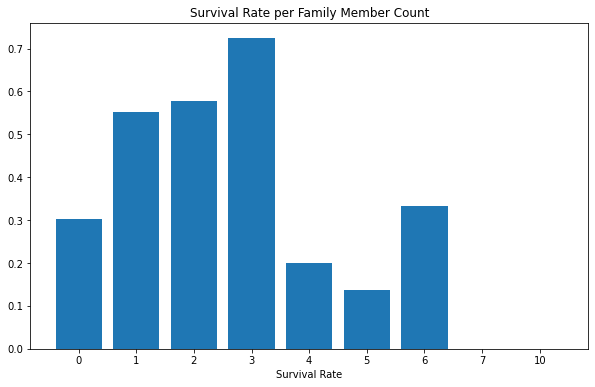

In [1627]:
data = train[['Family','Survived']].groupby(['Family'], as_index=False).mean()
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(np.arange(len(data)), data['Survived'], tick_label = data['Family'], align='center')
ax.set_xlabel('Survival Rate')
ax.set_title('Survival Rate per Family Member Count')

plt.show()

In [1628]:
family_scaler = MinMaxScaler()
family_scaler.fit(np.concatenate([train['Family'].values,test['Family'].values], axis=0).reshape(-1,1))

train['Family'] = family_scaler.transform(train['Family'].values.reshape(-1,1))
test['Family'] = family_scaler.transform(test['Family'].values.reshape(-1,1))

In [1629]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
PassengerId,,,,,,,,,,
1,0,1.0,1,0.273456,A/5 21171,7.2500,NaN,S,0.156673,0.1
2,1,0.0,0,0.473882,PC 17599,71.2833,C85,C,0.793651,0.1
3,1,1.0,0,0.323563,STON/O2. 3101282,7.9250,NaN,S,0.701087,0.0
4,1,0.0,0,0.436302,113803,53.1000,C123,S,0.793651,0.1
5,0,1.0,1,0.436302,373450,8.0500,NaN,S,0.156673,0.0


### Ticket

In [1630]:
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

### Fare

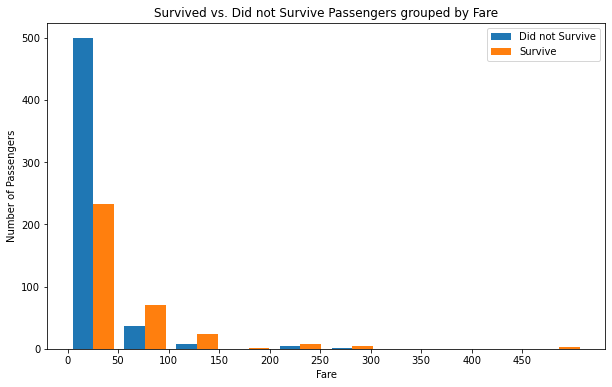

In [1631]:
fig, ax = plt.subplots(figsize=(10,6))

data = [train.loc[train['Survived']==0, 'Fare'], train.loc[train['Survived']==1, 'Fare']]
ax.hist(data, label=['Did not Survive','Survive'], bins=10)
ax.set_xlabel('Fare')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survived vs. Did not Survive Passengers grouped by Fare')
plt.xticks(range(0,500,50))
ax.legend()

plt.show()

In [1632]:
train['Fare'] = train['Fare'].fillna(train['Fare'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [1633]:
fare_scaler = MinMaxScaler()
fare_scaler.fit(np.concatenate([train['Fare'].values,test['Fare'].values], axis=0).reshape(-1,1))

train['Fare'] = fare_scaler.transform(train['Fare'].values.reshape(-1,1))
test['Fare'] = fare_scaler.transform(test['Fare'].values.reshape(-1,1))

In [1634]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
PassengerId,,,,,,,,,
1,0,1.0,1,0.273456,0.014151,NaN,S,0.156673,0.1
2,1,0.0,0,0.473882,0.139136,C85,C,0.793651,0.1
3,1,1.0,0,0.323563,0.015469,NaN,S,0.701087,0.0
4,1,0.0,0,0.436302,0.103644,C123,S,0.793651,0.1
5,0,1.0,1,0.436302,0.015713,NaN,S,0.156673,0.0


### Cabin

In [1635]:
train['Cabin'] = train['Cabin'].apply( lambda x: 'X' if (type(x) == float and math.isnan(x)) or x[:1] == 'T' else x[:1] )
test['Cabin'] = test['Cabin'].apply( lambda x: 'X' if (type(x) == float and math.isnan(x)) or x[:1] == 'T' else x[:1] )

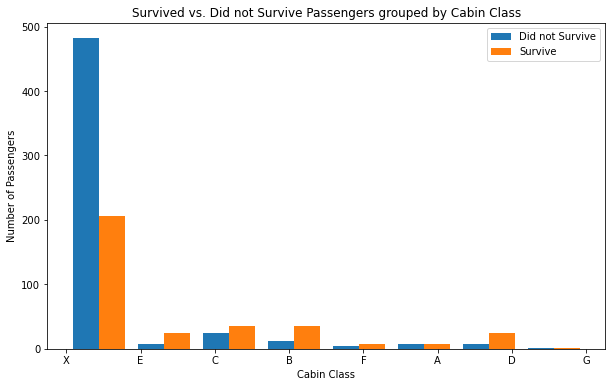

In [1636]:
fig, ax = plt.subplots(figsize=(10,6))

data = [train.loc[train['Survived']==0, 'Cabin'], train.loc[train['Survived']==1, 'Cabin']]
ax.hist(data, label=['Did not Survive','Survive'], bins=8)
ax.set_xlabel('Cabin Class')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survived vs. Did not Survive Passengers grouped by Cabin Class')
ax.legend()

plt.show()

In [1637]:
train = train.join(pd.get_dummies(train['Cabin'], prefix='Cabin')).drop(columns='Cabin')
test = test.join(pd.get_dummies(test['Cabin'], prefix='Cabin')).drop(columns='Cabin')

In [1638]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
PassengerId,,,,,,,,,,,,,,,,
1,0,1.0,1,0.273456,0.014151,S,0.156673,0.1,0,0,0,0,0,0,0,1
2,1,0.0,0,0.473882,0.139136,C,0.793651,0.1,0,0,1,0,0,0,0,0
3,1,1.0,0,0.323563,0.015469,S,0.701087,0.0,0,0,0,0,0,0,0,1
4,1,0.0,0,0.436302,0.103644,S,0.793651,0.1,0,0,1,0,0,0,0,0
5,0,1.0,1,0.436302,0.015713,S,0.156673,0.0,0,0,0,0,0,0,0,1


### Embarked

In [1639]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


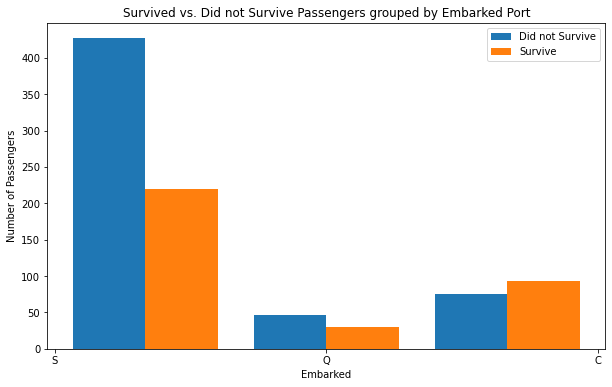

In [1640]:
fig, ax = plt.subplots(figsize=(10,6))

train['Embarked'] = train['Embarked'].fillna('S')

data = [train.loc[train['Survived']==0, 'Embarked'], train.loc[train['Survived']==1, 'Embarked']]
ax.hist(data, label=['Did not Survive','Survive'], bins=3)
ax.set_xlabel('Embarked')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survived vs. Did not Survive Passengers grouped by Embarked Port')
ax.legend()

plt.show()

In [1641]:
train = train.join(pd.get_dummies(train['Embarked'], prefix='Embarked')).drop(columns='Embarked')
test = test.join(pd.get_dummies(test['Embarked'], prefix='Embarked')).drop(columns='Embarked')

## Prediction

Split the dataset into X and y data (X is the data used for training, and y is the prediction)

In [1642]:
survived = train['Survived']
train = train.drop(columns=['Survived'])

### Logistic Regression

In [1657]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [1660]:
models = {
    'Logistic L1 penalty' : LogisticRegression(solver = 'liblinear', penalty='l1'),
    'Logistic L2 penalty' : LogisticRegression(solver = 'liblinear', penalty='l2'),
    'Sag L2 penalty' : LogisticRegression(solver = 'sag', penalty='l2'),
    'Sag None penalty' : LogisticRegression(solver = 'sag', penalty='none'),
    'Saga elasticnet penalty' : LogisticRegression(solver = 'saga', penalty='elasticnet', l1_ratio=0),
    'Saga L1 penalty' : LogisticRegression(solver = 'saga', penalty='l1'),
    'Saga L2 penalty' : LogisticRegression(solver = 'saga', penalty='l2'),
    'Saga None penalty' : LogisticRegression(solver = 'saga', penalty='none'),
    'Lbfgs None penalty' : LogisticRegression(solver = 'lbfgs', penalty='none'),
    'Lbfgs L2 penalty' : LogisticRegression(solver = 'lbfgs', penalty='l2')
}

X_train, X_test, y_train, y_test = train_test_split(train, survived, test_size=0.25)

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic L1 penalty,0.807175,0.707317,0.753247
Logistic L2 penalty,0.793722,0.695122,0.730769
Sag L2 penalty,0.793722,0.695122,0.730769
Sag None penalty,0.807175,0.731707,0.740741
Saga elasticnet penalty,0.793722,0.695122,0.730769
Saga L1 penalty,0.807175,0.707317,0.753247
Saga L2 penalty,0.793722,0.695122,0.730769
Saga None penalty,0.807175,0.731707,0.740741
Lbfgs None penalty,0.807175,0.731707,0.740741
Lbfgs L2 penalty,0.793722,0.695122,0.730769


In [1661]:
for key in models.keys():
    model = models[key]
    model.fit(train, survived)
    predictions = pd.DataFrame(data = model.predict(test), 
                  index = test.index, 
                  columns = ['Survived'])
    predictions.to_csv(f'Predictions_logistic_regression_{key}.csv')
    print(f'For {key}, score is {model.score(train, survived)}')

For Logistic L1 penalty, score is 0.8305274971941639
For Logistic L2 penalty, score is 0.8327721661054994
For Sag L2 penalty, score is 0.8327721661054994
For Sag None penalty, score is 0.8361391694725028
For Saga elasticnet penalty, score is 0.8327721661054994
For Saga L1 penalty, score is 0.8305274971941639
For Saga L2 penalty, score is 0.8327721661054994
For Saga None penalty, score is 0.8361391694725028
For Lbfgs None penalty, score is 0.8361391694725028
For Lbfgs L2 penalty, score is 0.8327721661054994
